### Angular magnification

In [1]:
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Rectangle, Ellipse, Circle
import numpy as np

np.random.seed(42)
np.set_printoptions(formatter={'float': '{: 0.4f}'.format})

plt.style.use('dark_background')

# color: https://matplotlib.org/stable/gallery/color/named_colors.html

In [2]:
def magnifier(ax, title=None, title_loc='center', fontsize=12):
    # Optical axis
    ax.plot([-1.2, 1.2], [0, 0], 'w', linewidth=2)

    # Distances
    d = 0.05
    f = 0.4

    # y1 and arrows
    ax.plot([-f, -f], [0, f/2], 'c', linewidth=2, zorder=5)
    ax.arrow(-f, f/2-0.1, 0, 0,  head_width=0.07, head_length=0.1, fc='c', ec='none')
    ax.text(-f-0.1, 0.1, r'$h$', horizontalalignment='center', verticalalignment='center', fontsize=fontsize, color='c')

    # Ray 1 (passing through center)
    ax.plot([-2*f, -f],[f, f/2], 'r--', linewidth=2)
    ax.plot([-f, 2*f],[f/2,-f], 'r', linewidth=2)
    ax.arrow(f, -f/2, 0.001*f, -0.001*f/2,  head_width=0.04, head_length=0.06, fc='w', ec='none', zorder=5)

    # Ray 2 (horizontal before lens)
    ax.plot([-f, 0],[f/2,f/2], 'r', linewidth=2)
    ax.plot([0, 2*f],[f/2,-f/2], 'r', linewidth=2)
    ax.plot([-2*f, 0],[f+f/2,f/2], 'r--', linewidth=2)
    ax.arrow(f, 0, 0.001*f, -0.001*f/2,  head_width=0.04, head_length=0.06, fc='w', ec='none', zorder=5)

    # f distance
    ax.plot([0, 0], [0, -0.1], 'w-', linewidth=1)
    ax.plot([0, f], [-0.05, -0.05], 'w-', linewidth=1)
    ax.plot([f, f], [0, -0.1], 'w-', linewidth=1)
    ax.plot([0, -f], [-0.05, -0.05], 'w-', linewidth=1)
    ax.plot([-f, -f], [0, -0.1], 'w-', linewidth=1)
    ax.text(f/2, -0.15, r'$f$', horizontalalignment='center', verticalalignment='center', fontsize=fontsize, color='w')
    ax.text(-f/2, -0.15, r'$f$', horizontalalignment='center', verticalalignment='center', fontsize=fontsize, color='w')
    ax.arrow(0.06, -0.05, -0.001, 0,  head_width=0.04, head_length=0.06, fc='w', ec='none')
    ax.arrow(f-0.06, -0.05, 0.001, 0,  head_width=0.04, head_length=0.06, fc='w', ec='none')
    ax.arrow(-0.06, -0.05, 0.001, 0,  head_width=0.04, head_length=0.06, fc='w', ec='none')
    ax.arrow(-f+0.06, -0.05, -0.001, 0,  head_width=0.04, head_length=0.06, fc='w', ec='none')

    # Arc and theta
    arc_theta = Arc([f, 0], 0.4, 0.4, theta1=180-np.rad2deg(np.arctan(0.5)), theta2=180, color='w')
    ax.add_patch(arc_theta)
    ax.text(f-0.3*np.cos(np.arctan(0.5)/2), 0.3*np.sin(np.arctan(0.5)/2), r'$\beta$', horizontalalignment='center', verticalalignment='center', fontsize=fontsize, color='w')

    # Lens
    lens = Ellipse((0,0), 0.1, 0.6, edgecolor='none', facecolor='skyblue', zorder=-5)
    ax.add_patch(lens)

    # Eyes
    pupil = Ellipse((0.5,0), d, 0.15, edgecolor='none', facecolor='gray', zorder=-5)
    ax.add_patch(pupil)
    retina = Circle((0.7,0), 0.2, edgecolor='none', facecolor='skyblue', zorder=-6)
    ax.add_patch(retina)

    # Set limits and aspect ratio
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-0.7, 0.7)
    ax.set_aspect('equal')
    ax.grid(True)
    ax.axis('off')

    if title:
        ax.set_title(title, loc=title_loc, fontsize=fontsize)

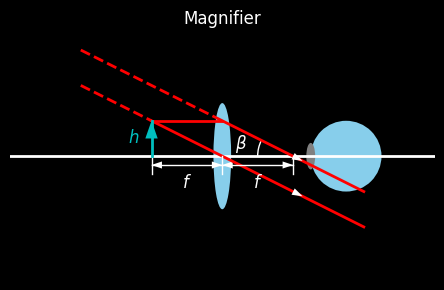

In [3]:
fig, ax = plt.subplots(figsize=(6, 3))

magnifier(ax, title='Magnifier')

plt.tight_layout()
plt.show()

Example #1: `magnifier`

To get most relaxed eyes, image should be formed at `infinity`

For object (height $h$) placed at $f$, $D$ is common focus distance of eye $\approx 25cm$, `unaided` viewing angle $\alpha$ and `aided` angle $\beta$ are (under paraxial approximation)

$$\alpha \approx \frac{h}{D}, \beta \approx \frac{h}{f}$$

So, angular magnification is

$$m=\frac{\beta}{\alpha} \approx \boxed{\frac{D}{f}}$$

In [4]:
def microscope(ax, title=None, title_loc='center', fontsize=12):
    # Optical axis
    ax.plot([-2.5, 2.5], [0, 0], 'w', linewidth=2)

    # Distances
    d = 0.05
    f = 0.4

    # y1 and arrows
    ax.plot([-5*f, -5*f], [0, f/2], 'c', linewidth=2, zorder=5)
    ax.arrow(-5*f, f/2-0.08, 0, 0,  head_width=0.07, head_length=0.1, fc='c', ec='none')
    ax.text(-5*f-0.1, 0.1, r'$h$', horizontalalignment='center', verticalalignment='center', fontsize=fontsize, color='c')

    # objective
    objective = Ellipse((-3*f,0), 0.1, 0.6, edgecolor='none', facecolor='skyblue', zorder=-5)
    ax.add_patch(objective)
    ax.text(-3*f, 0.3+0.15, 'objective', horizontalalignment='center', verticalalignment='center', fontsize=fontsize, color='w')

    # Ray 1 (passing through objective center)
    ax.plot([-5*f, 0],[f/2, -f/4*3], 'r', linewidth=2)
    ax.arrow(-f, -f/2, 0.001, -0.001/4,  head_width=0.04, head_length=0.06, fc='w', ec='none', zorder=5)

    # y2 and arrows
    ax.plot([0, 0], [0, -f/4*3], 'lime', linewidth=2, zorder=5)
    ax.arrow(0, -f/4*3+0.08, 0, -0.001,  head_width=0.07, head_length=0.1, fc='lime', ec='none')
    ax.text(-0.1, -0.1, r'$H$', horizontalalignment='center', verticalalignment='center', fontsize=fontsize, color='lime')

    # Eyepiece
    eyepiece = Ellipse((f,0), 0.1, 0.7, edgecolor='none', facecolor='skyblue', zorder=-5)
    ax.add_patch(eyepiece)
    ax.text(f, 0.3+0.15, 'eyepiece', horizontalalignment='center', verticalalignment='center', fontsize=fontsize, color='w')

    # Ray 2 (horizontal before lens)
    ax.plot([0, f],[-f/4*3,-f/4*3], 'r', linewidth=2)
    ax.plot([f, 3*f],[-f/4*3,f/4*3], 'r', linewidth=2)
    ax.plot([f, 0],[-f/4*3,-f/2*3], 'r--', linewidth=2)

    # Ray 3 (passing through eyepiece center)
    ax.plot([0, 3*f],[-f/4*3,f/2*3], 'r', linewidth=2)
    ax.plot([0, -f],[-f/4*3,-f/2*3], 'r--', linewidth=2)
    ax.arrow(2*f, f/4*3, 0.001, 0.001*3/4,  head_width=0.04, head_length=0.06, fc='w', ec='none', zorder=5)

    # f distance
    ax.plot([f, f], [0, 0.1], 'w-', linewidth=1)
    ax.plot([f, 2*f], [0.05, 0.05], 'w-', linewidth=1)
    ax.plot([2*f, 2*f], [0, 0.1], 'w-', linewidth=1)
    ax.plot([f, 0], [0.05, 0.05], 'w-', linewidth=1)
    ax.plot([0, 0], [0, 0.1], 'w-', linewidth=1)
    ax.text(3*f/2, 0.15, r'$f_e$', horizontalalignment='center', verticalalignment='center', fontsize=fontsize, color='w')
    ax.text(f/2, 0.15, r'$f_e$', horizontalalignment='center', verticalalignment='center', fontsize=fontsize, color='w')
    ax.arrow(0.06+f, 0.05, -0.001, 0,  head_width=0.04, head_length=0.06, fc='w', ec='none')
    ax.arrow(2*f-0.06, 0.05, 0.001, 0,  head_width=0.04, head_length=0.06, fc='w', ec='none')
    ax.arrow(f-0.06, 0.05, 0.001, 0,  head_width=0.04, head_length=0.06, fc='w', ec='none')
    ax.arrow(0.06, 0.05, -0.001, 0,  head_width=0.04, head_length=0.06, fc='w', ec='none')

    # Arc and theta
    arc_theta = Arc([2*f, 0], 0.4, 0.4, theta1=180, theta2=180+np.rad2deg(np.arctan(1/4*3)), color='w')
    ax.add_patch(arc_theta)
    ax.text(2*f-0.3*np.cos(np.arctan(1/4*3)/2), -0.3*np.sin(np.arctan(1/4*3)/2), r'$\beta$', horizontalalignment='center', verticalalignment='center', fontsize=fontsize, color='w')

    # Eyes
    pupil = Ellipse((2*f+0.1,0), d, 0.15, edgecolor='none', facecolor='gray', zorder=-5)
    ax.add_patch(pupil)
    retina = Circle((2*f+0.3,0), 0.2, edgecolor='none', facecolor='skyblue', zorder=-6)
    ax.add_patch(retina)

    # Set limits and aspect ratio
    ax.set_xlim(-2.5, 2.5)
    ax.set_ylim(-0.7, 0.7)
    ax.set_aspect('equal')
    ax.grid(True)
    ax.axis('off')

    if title:
        ax.set_title(title, loc=title_loc, fontsize=fontsize)

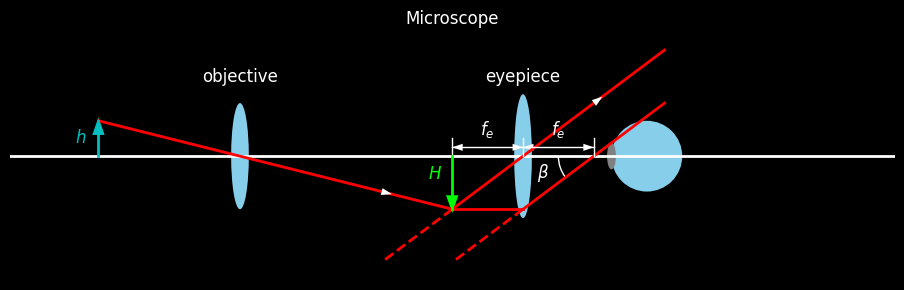

In [5]:
fig_1, ax_1 = plt.subplots(figsize=(12, 3))

microscope(ax_1, title='Microscope')

plt.tight_layout()
plt.show()

Example #2: `microscope`

Real image (height $H$, negative direction) of object from objective lens formed at front focal distance $f_e$ of eyepiece

Angular magnification is

$$m=\frac{\beta}{\alpha} \approx -\frac{\frac{H}{f_e}}{\frac{h}{D}} = \left(-\frac{H}{h} \right)\frac{D}{f_e}=\boxed{M_o m_e}$$

$M_o$ is linear magnification of objective lens, $m_e$ is angular magnification of eyepiece (same as magnifier)

In [6]:
def telescope(ax, title=None, title_loc='center', fontsize=12):
    # Optical axis
    ax.plot([-2.5, 2.5], [0, 0], 'w', linewidth=2)

    # Distances
    d = 0.05
    f = 0.4

    # telescope lens
    objective = Ellipse((-3*f,0), 0.1, 0.6, edgecolor='none', facecolor='skyblue', zorder=-5)
    ax.add_patch(objective)
    ax.text(-3*f, 0.3+0.15, 'telescope lens', horizontalalignment='center', verticalalignment='center', fontsize=fontsize, color='w')

    # Ray 1 (passing through lens center)
    ax.plot([-5*f, 0],[f/2, -f/4*3], 'r', linewidth=2)
    ax.arrow(-4.5*f, f/4+f/8, 0.001, -0.001/4,  head_width=0.04, head_length=0.06, fc='w', ec='none', zorder=5)

    # Ray 2 (another incoming ray)
    ax.plot([-5*f, -3*f],[f, f/2], 'r', linewidth=2)
    ax.plot([-3*f, 0],[f/2, -f/4*3], 'r', linewidth=2)
    ax.arrow(-4.5*f, f/4*3+f/8, 0.001, -0.001/4,  head_width=0.04, head_length=0.06, fc='w', ec='none', zorder=5)

    # y2 and arrows
    ax.plot([0, 0], [0, -f/4*3], 'lime', linewidth=2, zorder=5)
    ax.arrow(0, -f/4*3+0.08, 0, -0.001,  head_width=0.07, head_length=0.1, fc='lime', ec='none')
    ax.text(-0.1, -0.1, r'$H$', horizontalalignment='center', verticalalignment='center', fontsize=fontsize, color='lime')

    # Eyepiece
    eyepiece = Ellipse((f,0), 0.1, 0.7, edgecolor='none', facecolor='skyblue', zorder=-5)
    ax.add_patch(eyepiece)
    ax.text(f, 0.3+0.15, 'eyepiece', horizontalalignment='center', verticalalignment='center', fontsize=fontsize, color='w')

    # Ray 3 (horizontal before lens)
    ax.plot([0, f],[-f/4*3,-f/4*3], 'r', linewidth=2)
    ax.plot([f, 3*f],[-f/4*3,f/4*3], 'r', linewidth=2)
    ax.plot([f, 0],[-f/4*3,-f/2*3], 'r--', linewidth=2)

    # Ray 4 (passing through eyepiece center)
    ax.plot([0, 3*f],[-f/4*3,f/2*3], 'r', linewidth=2)
    ax.plot([0, -f],[-f/4*3,-f/2*3], 'r--', linewidth=2)
    ax.arrow(2*f, f/4*3, 0.001, 0.001*3/4,  head_width=0.04, head_length=0.06, fc='w', ec='none', zorder=5)

    # f_e distance
    ax.plot([f, f], [0, 0.1], 'w-', linewidth=1)
    ax.plot([f, 2*f], [0.05, 0.05], 'w-', linewidth=1)
    ax.plot([2*f, 2*f], [0, 0.1], 'w-', linewidth=1)
    ax.plot([f, 0], [0.05, 0.05], 'w-', linewidth=1)
    ax.plot([0, 0], [0, 0.1], 'w-', linewidth=1)
    ax.text(3*f/2, 0.15, r'$f_e$', horizontalalignment='center', verticalalignment='center', fontsize=fontsize, color='w')
    ax.text(f/2, 0.15, r'$f_e$', horizontalalignment='center', verticalalignment='center', fontsize=fontsize, color='w')
    ax.arrow(0.06+f, 0.05, -0.001, 0,  head_width=0.04, head_length=0.06, fc='w', ec='none')
    ax.arrow(2*f-0.06, 0.05, 0.001, 0,  head_width=0.04, head_length=0.06, fc='w', ec='none')
    ax.arrow(f-0.06, 0.05, 0.001, 0,  head_width=0.04, head_length=0.06, fc='w', ec='none')
    ax.arrow(0.06, 0.05, -0.001, 0,  head_width=0.04, head_length=0.06, fc='w', ec='none')

    # f_t distance
    ax.plot([-3*f, -3*f], [0, 0.1], 'w-', linewidth=1)
    ax.plot([-3*f, 0], [0.05, 0.05], 'w-', linewidth=1)
    ax.arrow(-0.06, 0.05, 0.001, 0,  head_width=0.04, head_length=0.06, fc='w', ec='none')
    ax.arrow(-3*f+0.06, 0.05, -0.001, 0,  head_width=0.04, head_length=0.06, fc='w', ec='none')
    ax.text(-3*f/2, 0.15, r'$f_t$', horizontalalignment='center', verticalalignment='center', fontsize=fontsize, color='w')

    # Arc and beta
    arc_beta = Arc([2*f, 0], 0.4, 0.4, theta1=180, theta2=180+np.rad2deg(np.arctan(1/4*3)), color='w')
    ax.add_patch(arc_beta)
    ax.text(2*f-0.3*np.cos(np.arctan(1/4*3)/2), -0.3*np.sin(np.arctan(1/4*3)/2), r'$\beta$', horizontalalignment='center', verticalalignment='center', fontsize=fontsize, color='w')

    # Arc and alpha
    arc_alpha = Arc([-3*f, 0], 0.4, 0.4, theta1=180-np.rad2deg(np.arctan(1/4)), theta2=180, color='w')
    ax.add_patch(arc_alpha)
    ax.text(-3*f-0.4*np.cos(np.arctan(1/4)/2), 0.4*np.sin(np.arctan(1/4)/2), r'$\alpha$', horizontalalignment='center', verticalalignment='center', fontsize=fontsize, color='w')

    # Eyes
    pupil = Ellipse((2*f+0.1,0), d, 0.15, edgecolor='none', facecolor='gray', zorder=-5)
    ax.add_patch(pupil)
    retina = Circle((2*f+0.3,0), 0.2, edgecolor='none', facecolor='skyblue', zorder=-6)
    ax.add_patch(retina)

    # Set limits and aspect ratio
    ax.set_xlim(-2.5, 2.5)
    ax.set_ylim(-0.7, 0.7)
    ax.set_aspect('equal')
    ax.grid(True)
    ax.axis('off')

    if title:
        ax.set_title(title, loc=title_loc, fontsize=fontsize)

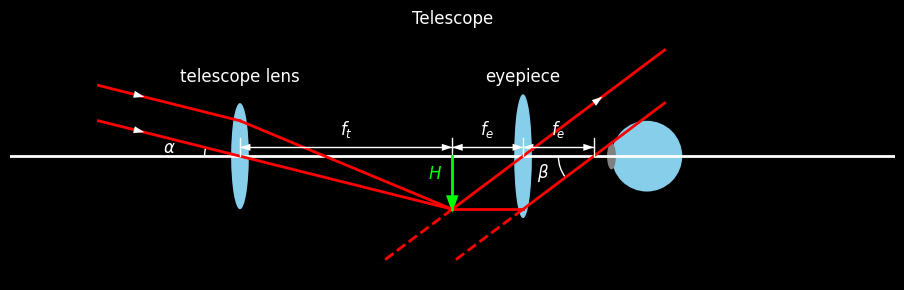

In [7]:
fig_2, ax_2 = plt.subplots(figsize=(12, 3))

telescope(ax_2, title='Telescope')

plt.tight_layout()
plt.show()

Example #3: `telescope`

Image from object far away forms parallel rays angled at $\alpha$ entering telescope lens and human eye (due to large distance)

Real image of object from telescope lens formed at back focal distance of telescope lens $f_t$ and front focal distance $f_e$ of eyepiece

Angular magnification is

$$m=\frac{\beta}{\alpha} \approx -\frac{\frac{H}{f_e}}{\frac{H}{f_t}} = \boxed{-\frac{f_t}{f_e}}$$